### TẢI CÁC THƯ VIỆN CẦN THIẾT

In [22]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [4]:
pip install pandas numpy matplotlib wordcloud deep_translator pyvi emoji

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.8 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 22.0 MB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 46.5 MB/s eta 0:00:01
     |████████████████████████████████| 168 kB 48.1 MB/s eta 0:00:01
  Using cached deep_translator-1.11.4-py3-none-any.whl (42 kB)
  Using cached pyvi-0.1.1-py2.py3-none-any.whl (8.5 MB)
  Using cached emoji-2.15.0-py3-none-any.whl (608 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl (348 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
     |████████████████████████████████| 4.7 MB 62.5 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 42.4 MB/s eta 0:00:01
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     |████████████████████████████████| 64 kB 4.9 MB/s eta 0:00:011
     |████████████████████████████████| 2.9 MB 41.6 MB/s eta 0:00:01
     |█████████████████████

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import các hàm từ file src/preprocessing.py chúng ta vừa tạo
from src.preprocessing import apply_translation, preprocess_pipeline, plot_wordcloud, plot_doc_length

# Cấu hình hiển thị (tùy chọn)
%matplotlib inline

### TẢI FILE

In [14]:
# Đường dẫn file gốc
input_path = 'data/reviewjob.csv' 
# Đường dẫn file sẽ lưu sau khi xử lý
output_path = 'data/topic_modeling_data.csv'

df_raw = pd.read_csv(input_path)
print(f"Dữ liệu gốc có {df_raw.shape[0]} dòng.")
df_raw.head()

Dữ liệu gốc có 3794 dòng.


,content
0,CV của một bạn nữ fresher mới ra trường với mi...
1,"- Phần “About me” ngắn gọn, đi thẳng vào trọng..."
2,1.5 năm kinh nghiệm và các impact cụ thể. Đây ...
3,+ Bằng Cử nhân QTKD GPA 8.34 là một lợi thế.\n...
4,"+ Cover 3 ngành: E-Commerce, Transport/Deliver..."


--- Biểu đồ WordCloud trước preprocessing ---


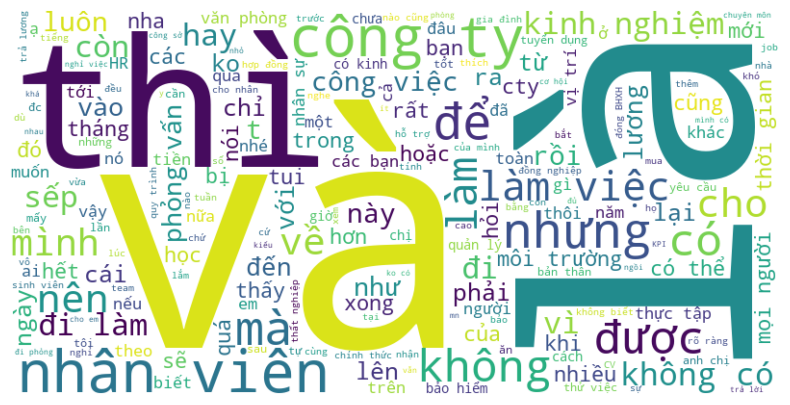

In [18]:
print("--- Biểu đồ WordCloud trước preprocessing ---")
plot_wordcloud(df_raw['content'])

## TIỀN XỬ LÝ:
- ĐẢM BẢO TOÀN BỘ TIẾNG VIỆT, GIỮ LẠI THUẬT NGỮ VỀ VAI TRÒ CÔNG VIỆC TIỀNG ANH ĐẶC TRƯNG
- LOẠI BỎ CÁC VĂN BẢN KHÔNG ĐÁNG GIÁ, GÂY NHIỄU
- XỬ LÝ CÁC TỪ NGỮ GÂY NHIỄU NHƯ @, LINK,...
- TOKENIZE

In [15]:
# Hàm chạy dịch thuật tốn nhiều thời gian để thực hiện
# df = apply_translation(df, col_name='content') 
# df.head()

In [16]:
#df được sử dụng sau khi dịch tiếng anh
df = pd.read_csv(output_path)

In [17]:
stopwords_file = 'data/vietnamese-stopwords.txt'

df = preprocess_pipeline(df, col_name='content', stopwords_path=stopwords_file)

df[['content', 'clean_text']].head()

--- Bắt đầu tiền xử lý (Tokenization & Normalization) ---
--- Đang chạy bộ lọc nâng cao (Super Filter) ---
Hoàn tất. Dữ liệu gốc: 3085 -> Còn lại: 3066 dòng.


,content,clean_text
0,CV của một bạn nữ Fresher mới ra trường với tư...,hồ_sơ nữ fresher trường tư_duy cực đỉnh bố_cục...
1,"- Phần “Giới thiệu về tôi” ngắn gọn, đi thẳng ...",giới_thiệu ngắn_gọn thẳng trọng_tâm vai_trò it...
2,"1,5 năm kinh nghiệm và các công cụ tác động. Đ...",kinh_nghiệm công_cụ tác_động kiểu tóm_tắt điều...
3,"+ Bằng cử nhân QTKD GPA 8,34 là một lợi ích.\n...",cử_nhân qtkd gpa lợi_ích chứng_chỉ product own...
4,"+ Bao gồm 3 chuyên ngành: Thương mại điện tử, ...",bao_gồm chuyên_ngành thương_mại điện_tử_vận_tả...


--- Biểu đồ WordCloud sau preprocess---


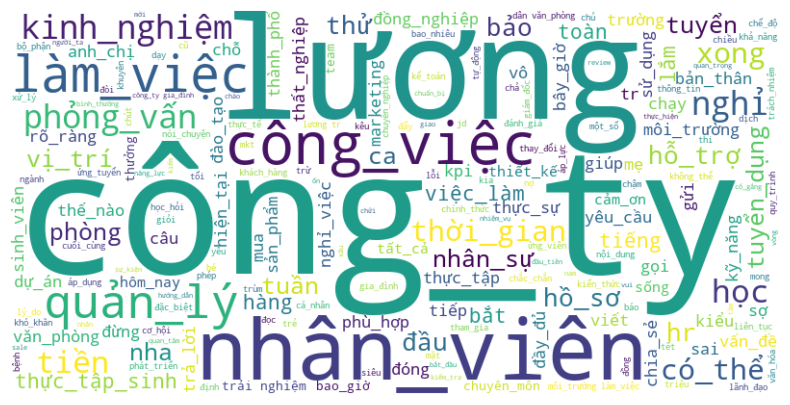

--- Phân bố độ dài văn bản ---


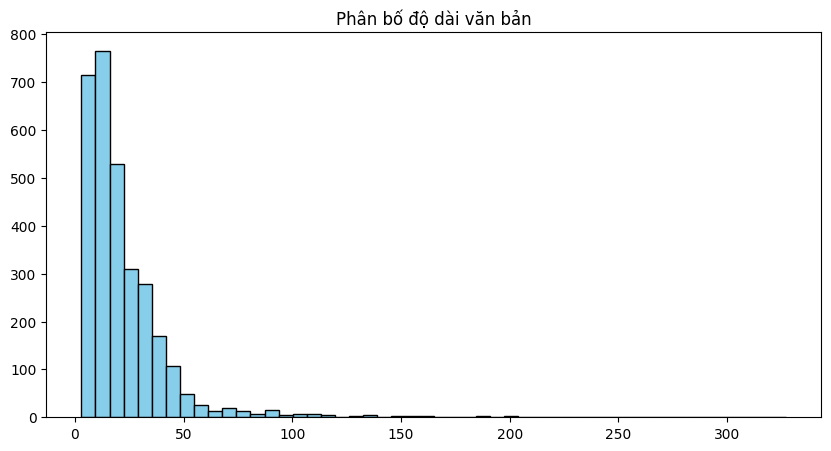

In [19]:
print("--- Biểu đồ WordCloud sau preprocess---")
plot_wordcloud(df['clean_text'])

print("--- Phân bố độ dài văn bản ---")
plot_doc_length(df['clean_text'])

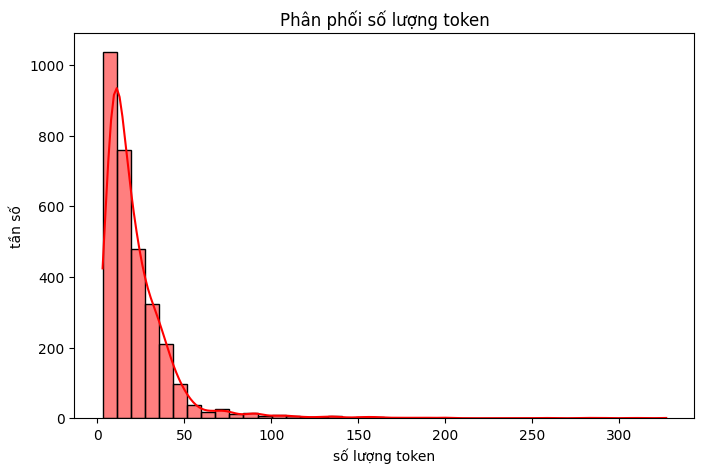

In [20]:
def token_count(tokens):
    return len(tokens)
df["token_count"] = df["tokens"].apply(token_count)
plt.figure(figsize=(8,5))
sns.histplot(df["token_count"], bins=40, kde=True, color='red')
plt.title("Phân phối số lượng token")
plt.xlabel("số lượng token")
plt.ylabel("tần số")
plt.show()

lương : 1439
công_ty : 1220
nhân_viên : 1149
công_việc : 669
làm_việc : 656
nghỉ : 441
phỏng_vấn : 436
kinh_nghiệm : 430
quản_lý : 408
tiền : 390
học : 379
thời_gian : 354
có_thể : 312
đóng : 311
môi_trường : 305
xong : 274
ca : 268
hồ_sơ : 262
tuyển : 237
thử : 220


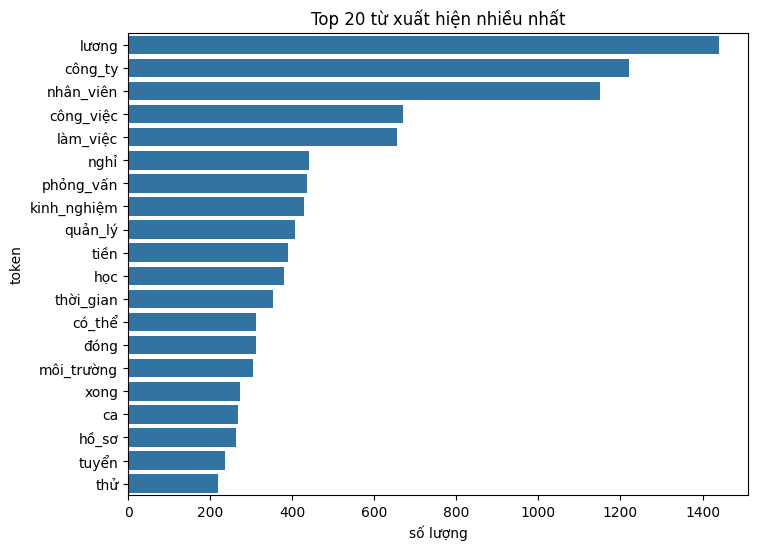

In [21]:
from collections import Counter
token_freq = Counter([w for tokens in df["tokens"] for w in tokens])
top20 = token_freq.most_common(20)
for w,c in top20:
    print(w,":",c)
words, counts = zip(*top20)

plt.figure(figsize=(8,6))
sns.barplot(x=list(counts), y=list(words))
plt.title("Top 20 từ xuất hiện nhiều nhất")
plt.xlabel("số lượng")
plt.ylabel("token")
plt.show()